<a href="https://colab.research.google.com/github/ADUSUMALLI25/dinesh/blob/main/Copy_of_Uber_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uber prediction analysis


In [ ]:
%pylab inline
import pandas
import seaborn

data = pandas.read_csv('uber-raw-data-apr14.csv')
data.tail()

Populating the interactive namespace from numpy and matplotlib


,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Convert datatime and some useful columns


In [ ]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)
data.tail()

,Date/Time,Lat,Lon,Base
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764


In [ ]:
def get_dom(dt):
 return dt.day
data['dom'] = data['Date/Time'].map(get_dom)
data.tail()
def get_weekday(dt):
 return dt.weekday()
data['weekday'] = data['Date/Time'].map(get_weekday)
def get_hour(dt):
  return dt.hour
data['hour'] = data['Date/Time'].map(get_hour)
data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


# Clustering

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


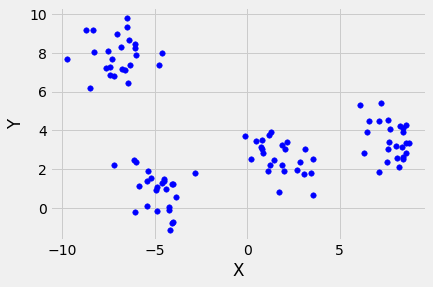

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
style.use("fivethirtyeight")
X, y = make_blobs(n_samples = 100, centers = 4,
cluster_std = 1, n_features = 2)
plt.scatter(X[:, 0], X[:, 1], s = 30, color ='b') 
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.clf()

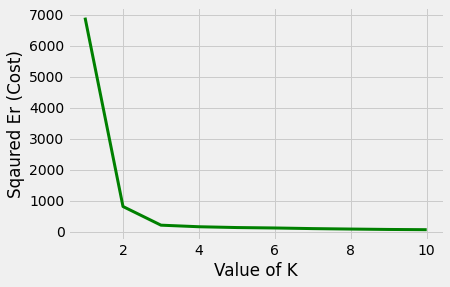

In [ ]:
cost =[]
for i in range(1, 11):
 KM = KMeans(n_clusters = i, max_iter = 500)
 KM.fit(X)

 # calculates squared error
 # for the clustered points
 cost.append(KM.inertia_)
# plot the cost against K values
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Sqaured Er (Cost)")
plt.show() # clear the plot
# the point of the elbow is the
# most optimal value for choosing k

# Linear Regression


alpha = -76.35049464906486
betas = [0.05826405]


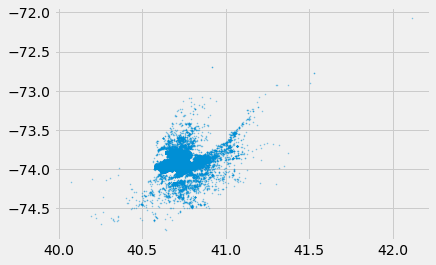

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
predictors = ['Lat']
X= data[predictors]
y= data['Lon']
lm = LinearRegression()
model = lm.fit(X, y)
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')
ab=model.predict(X)
ab
plot(data[predictors],data['Lon'] ,'.', ms=1, alpha=.5)

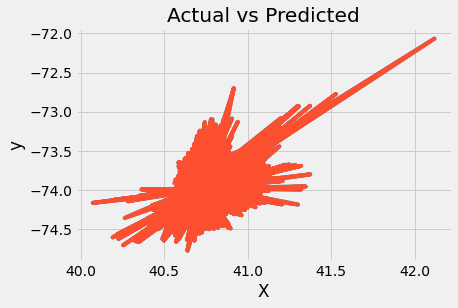

In [ ]:
plt.plot(X, y) # regression line
plt.plot(X, y) # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

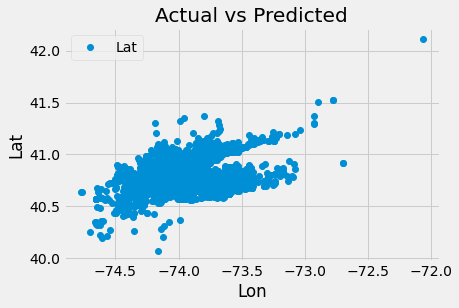

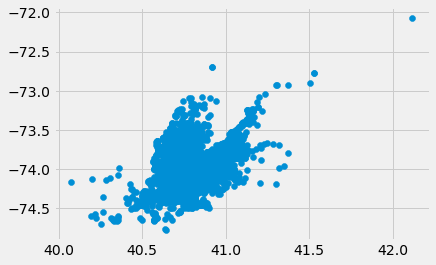

In [ ]:
data.plot(x='Lon', y='Lat', style='o')
plt.title('Actual vs Predicted')
plt.xlabel('Lon')
plt.ylabel('Lat')
plt.show()
plt.scatter(X, y)
plt.show()


# analysis

Text(0.5, 1.0, 'Frequency by DoM - uber - Apr 2014')

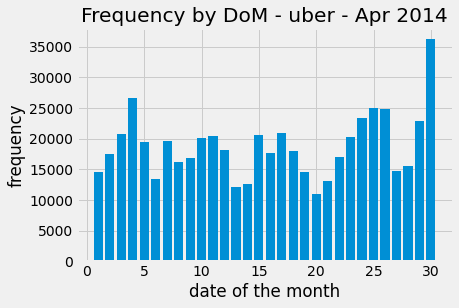

In [ ]:
hist(data.dom, bins=30, rwidth=.8, range=(0.5, 30.5))
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DoM - uber - Apr 2014')

In [ ]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

<BarContainer object of 30 artists>

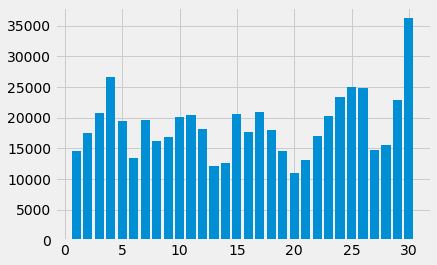

In [ ]:
bar(range(1, 31), by_date)

''

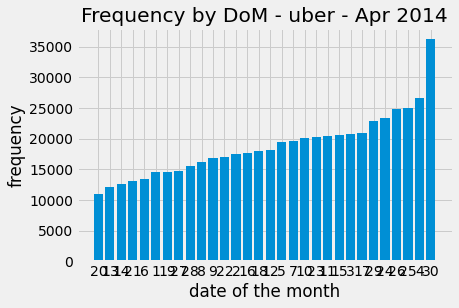

In [ ]:
by_date_sorted = by_date.sort_values()
by_date_sorted
bar(range(1, 31), by_date_sorted)
xticks(range(1,31), by_date_sorted.index)
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DoM - uber - Apr 2014')
;

# Analyze the hour

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <a list of 24 Patch objects>)

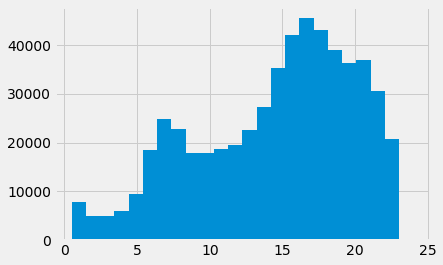

In [ ]:
hist(data.hour, bins=24, range=(.5, 24))


([<matplotlib.axis.XTick at 0x7f2722eb9210>,
 [Text(0, 0, 'Mon'),
  Text(0, 0, 'Tue'),
  Text(0, 0, 'Wed'),
  Text(0, 0, 'Thu'),
  Text(0, 0, 'Fri'),
  Text(0, 0, 'Sat'),
  Text(0, 0, 'Sun')])

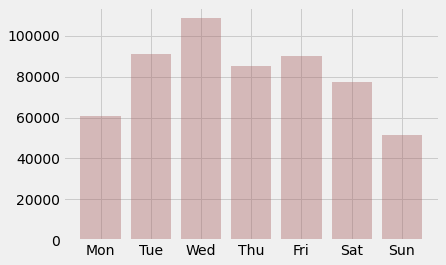

In [ ]:
hist(data.weekday, bins=7, range =(-.5,6.5), rwidth=.8, color='#AA6666', alpha=.4)
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())


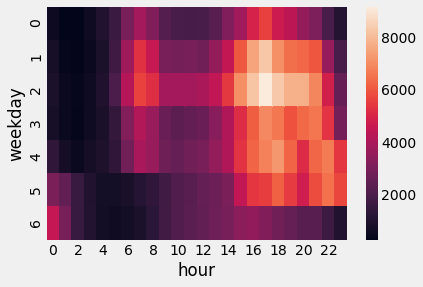

In [ ]:
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()
seaborn.heatmap(by_cross)


# by lat and lon

''

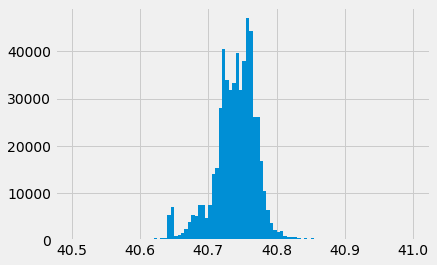

In [ ]:
hist(data['Lat'], bins=100, range = (40.5, 41))
;

''

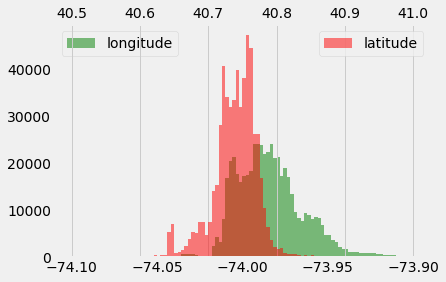

In [ ]:

hist(data['Lon'], bins=100, range = (-74.1, -73.9), color='g', alpha=.5, label = 'longitude')
grid()
legend(loc='upper left')
twiny()
hist(data['Lat'], bins=100, range = (40.5, 41), color='r', alpha=.5, label = 'latitude')
legend(loc='best')
;

(40.7, 41.0)

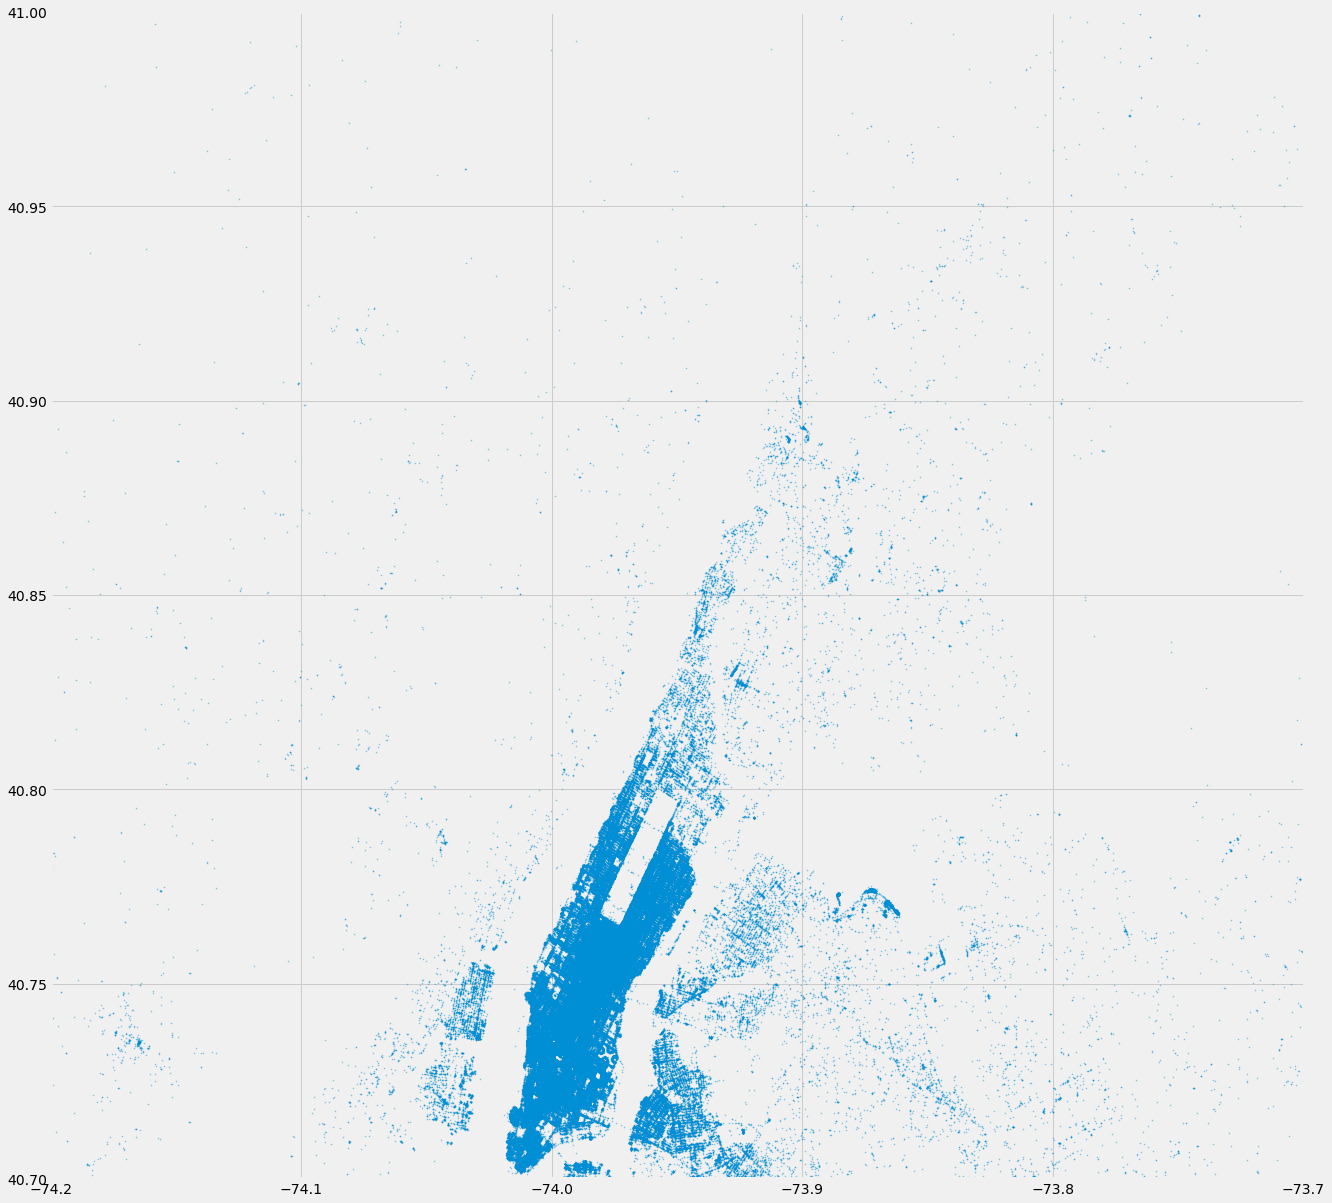

In [ ]:
figure(figsize=(20, 20))
plot(data['Lon'], data['Lat'], '.', ms=1, alpha=.5)
xlim(-74.2, -73.7)
ylim(40.7, 41)